# Анализ сервиса аренды самокатов GoFast

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:

Без подписки
- абонентская плата отсутствует;
- стоимость одной минуты поездки — 8 рублей;
- стоимость старта (начала поездки) — 50 рублей;

С подпиской Ultra
- абонентская плата — 199 рублей в месяц;
- стоимость одной минуты поездки — 6 рублей;
- стоимость старта — бесплатно.

***Цель проекта***

Проанализировать данные (пользователи из нескольких городов, а также об их поездках) и проверить некоторые гипотезы, которые помогут сервису аренды самокатов GoFast вырасти.

***Описание данных***

***Пользователи*** — users_go.csv

- user_id — уникальный идентификатор пользователя
- name — имя пользователя
- age — возраст
- city — город
- subscription_type — тип подписки (free, ultra)

***Поeздки*** — rides_go.csv

- user_id — уникальный идентификатор пользователя
- distance — расстояние, которое пользователь проехал в текущей сессии (в метрах)
- duration — продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
- date — дата совершения поездки

***Подписки*** — subscriptions_go.csv

- subscription_type — тип подписки
- minute_price — стоимость одной минуты поездки по данной подписке
- start_ride_price — стоимость начала поездки
- subscription_fee — стоимость ежемесячного платежа

## 1. Загрузка данных

In [1]:
#импортируем нужные для работы библиотеки 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
from scipy import stats as st

Открываем ***Таблицу с пользователями*** - users_go.csv

In [2]:
try:
    data_users = pd.read_csv('/datasets/users_go.csv')
    data_riders = pd.read_csv('/datasets/rides_go.csv')
    data_sub = pd.read_csv('/datasets/subscriptions_go.csv')
except:
    data_users = pd.read_csv('https://code.s3.yandex.net/datasets/users_go.csv')
    data_riders = pd.read_csv('https://code.s3.yandex.net/datasets/rides_go.csv')
    data_sub = pd.read_csv('https://code.s3.yandex.net/datasets/subscriptions_go.csv')


In [3]:
#изучаем данные таблицы users_go
data_users.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [4]:
#выводим информацию о таблице users_go
data_users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


***Вывод***:

Данные в таблице ***users_go*** пригодные для работы. Число строк - 1565, пропусков не обнаруженно! 

In [5]:
#изучим таблицу rides_go
data_riders.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [6]:
#Получаем информацию о таблице rides_go
data_riders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


***Вывод:***

В таблице ***rides_go*** 18068 строк, пропусков не обнаружено,данные пригодны для работы!


In [7]:
#Изучаем таблицу subscriptions_go
data_sub.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [8]:
#Получаем информацию о  таблице subscriptions_go
data_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


***Вывод***

В таблине ***subscriptions_go*** 2 строки, пропуски отсутствуют. Данные пригодны для работы! 

### Вывод о загрузке данных
- Данные загружаны и открыты
- целосность данных на высоком уровне
- ***users_go***:
  - Число строк - 1565, пропусков не обнаруженно!
- ***rides_go***: 
  - 18068 строк, пропусков не обнаружено!
- ***subscriptions_go***
  -  2 строки, пропуски отсутствуют!
  
Можно приступать к предобработке данных ! 

## 2 Предобработка данных

***Приведем столбец date к типу даты pandas***

In [9]:
#Приводим столбец date к типу даты 
data_riders['date'] = pd.to_datetime(data_riders['date'], format = '%Y-%m-%d')

In [10]:
#провереяем успешно ли изменение
data_riders['date']

0       2021-01-01
1       2021-01-18
2       2021-04-20
3       2021-08-11
4       2021-08-28
           ...    
18063   2021-11-04
18064   2021-11-16
18065   2021-11-18
18066   2021-11-27
18067   2021-12-29
Name: date, Length: 18068, dtype: datetime64[ns]

***Создаем новый столбец с номером месяца на основе столбца date:***

In [11]:
#Создаем столбец с месяцами
data_riders['month'] = data_riders['date'].dt.month

In [12]:
#Проверим результат
data_riders['month'].head()

0    1
1    1
2    4
3    8
4    8
Name: month, dtype: int64

Новый столбец,  в котором отображается месяц поездки - ***создан***!

 ***Проверим наличие пропущенных значений и дубликатов в датафреймах.***
 
 ***Обработаем их, если такие значения присутствуют.***

Проверяем дубликаты в ***data_users***

In [13]:
data_users.duplicated().sum()

31

В таблице ***data_users*** 31 явный дубликат! Удаляем, для того, чтобы они не помешали в дальнейшем иследованию!

In [14]:
#Удаляем дубликаты
data_users.drop_duplicates(inplace =True)
#проверяем результат
data_users.duplicated().sum()

0

Проверяем дубликаты в ***data_riders***

In [15]:
data_riders.duplicated().sum()

0

Явных дубликатов в ***data_riders*** не обноруженно!

Проверяем дубликаты в ***data_sub***

In [16]:
data_sub.duplicated().sum()

0

Явных дубликатов в ***data_sub*** не обноруженно!

***Вывод***

В датафреме ***data_users*** находилось 31 явных дубикатов. Все дубликаты были удалены!

В датафремах ***data_riders*** и ***data_sub*** явных дубликатов не обнаружено !

### Общий вывод о предобработке данных: 

- Столбец date приведен к формату datetime64
- Добавлен столбец month, в котором указан месяц поездки
- Все явные дубликаты были удалены

##  3. Исследовательский анализ данных

Опишем и визуализируем общую информацию о пользователях и поездках:

- 3.1 частота встречаемости городов;
- 3.2 соотношение пользователей с подпиской и без подписки;
- 3.3 возраст пользователей;
- 3.4 расстояние, которое пользователь преодолел за одну поездку;
- 3.5 продолжительность поездок.

### 3.1  частота встречаемости городов:

In [17]:
#Проверим в каких городах собиралась информация
count_users_by_city = data_users['city'].value_counts()
count_users_by_city

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

Для того, чтобы визуально было проще понять какие города участвовали в иследовании построим круговую диограмму, и в процентном соотношении покажем колличество пользователей!

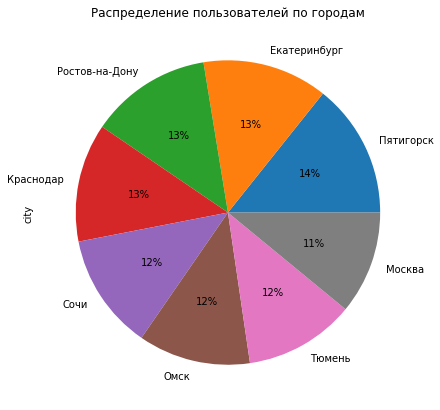

In [18]:
#Проверим, какое процент пользователй от всего количества в том или ином городе
data_users['city'].value_counts().plot(
    kind = 'pie', 
    y = count_users_by_city,
    autopct = '%1.0f%%',
    figsize=(7,7), 
    title = 'Распределение пользователей по городам');

***Вывод:***

На круговой диограме видно что примерно одининаковое колличество пользователей в каждом городе.

***Большее*** количество пользователей находятся в Пятигрске - 14% 

***Наименьшее*** колличество пользователей в Москве - 11%

### 3.2 Cоотношение пользователей с подпиской и без подписки:

In [19]:
count_sub = data_users['subscription_type'].value_counts()
count_sub

free     835
ultra    699
Name: subscription_type, dtype: int64

Количество людей с потпиской и без:
- 846 пользоватей полюзуется приложением без платной подписки
- 719 пользователей пользуются подпиской 

Далее проверим, сколько это в процентном соотношении

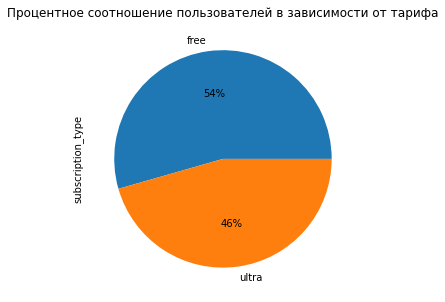

In [20]:
data_users['subscription_type'].value_counts().plot(
    kind = 'pie', 
    y = count_sub, 
    autopct = '%1.0f%%', 
    figsize=(5,5),
    title = 'Процентное соотношение пользователей в зависимости от тарифа');

***Вывод:***
    
   ***Без подписки*** - 54%
   
   ***Подписка*** - 46%
    
На ***10%*** больше группа, кторая не покупает платную подписку

### 3.3 Возраст пользователей:

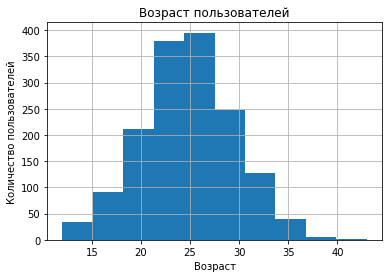

In [21]:
# рассмотрим распределение возврастов в data_users
plt.hist(data_users['age'], bins = 10)
plt.title('Возраст пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.grid()
plt.show()

***Вывод:***

    Приобладающий возвраст лбдей, которые пользуются приложением от 18 до 32 лет
    
Так же заметен пик в значении 25 - 27 лет, которых большенство!

### 3.4 Расстояние, которое пользователь преодолел за одну поездку:

In [22]:
#проверим самые длинные поездки и огруглим до 2 цифр после запятой
data_riders['distance'].sort_values(ascending=False).round(2)

16309    7211.01
16484    7066.00
15580    6908.49
17171    6760.94
17242    6724.93
          ...   
7841        7.10
8658        6.78
13690       4.33
9541        2.57
11555       0.86
Name: distance, Length: 18068, dtype: float64

В данных есть как значения больше 7 км так и значение меньше 1 метра.

Чтобы более точно сделать вывод построем боксплод и поймем где находится выбросы (значение, которые сильно больше или меньше остальных), и в каких примерах находятся срении значения растояния поездок

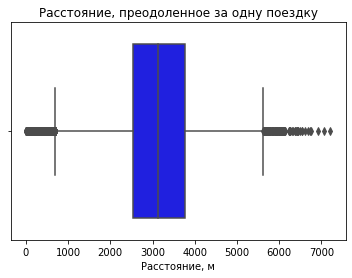

In [23]:
sns.boxplot(x=data_riders['distance'], color='blue')
plt.title('Расстояние, преодоленное за одну поездку')
plt.xlabel('Расстояние, м')
plt.show()

***Вывод:***
    В основном пользователи проезжают от 2.5 км до 4 км.
    
    Самая короткая поезда - 0.86 м
    Самая длинная поездка - 7211.01 м

### 3.5 Продолжительность поездок:

In [24]:
#Посмотрим на самые долшие поездки
data_riders['duration'].sort_values(ascending=False).round(2)

4215     40.82
4709     39.87
2623     39.53
1998     38.35
6453     38.27
         ...  
6768      0.50
7883      0.50
16179     0.50
9497      0.50
16704     0.50
Name: duration, Length: 18068, dtype: float64

Ситуация аналогична той, что произошла с растоянием поездки.

Пользователи могли проехать 40 минут, а также и 30 секунд. Вероятно, польщователь отменил аренду. Для более точной оценки постоим боксплот 

Тут так же следует учесть, что один пользователь скорее всего мог прокатиться несколько раз, поэтому проверим как среднюю продолжительность 1 поездки так и время всех поездок 1го пользователя (в следующем пункте)

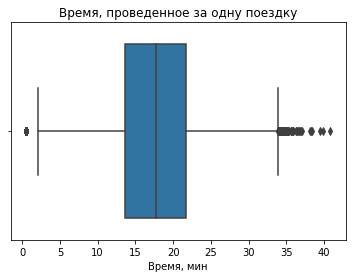

In [25]:
#Боксплот для времени 1 поездки, без привязки к конкретному пользователю 

sns.boxplot(x=data_riders['duration'])
plt.title('Время, проведенное за одну поездку')
plt.xlabel('Время, мин')
plt.show()

In [26]:
data_riders['duration'].sort_values().head(20)

12013    0.5
17314    0.5
15029    0.5
7437     0.5
12967    0.5
15015    0.5
13012    0.5
7508     0.5
16589    0.5
9049     0.5
7537     0.5
16540    0.5
13266    0.5
10426    0.5
11559    0.5
7612     0.5
9077     0.5
17909    0.5
16704    0.5
9698     0.5
Name: duration, dtype: float64

***Вывод:***
  
В основном же длительность поездки состовляет 13 - 22 минут.

## Вывод по разделу Исследовательский анализ данных


***Частота встречаемости городов***

- Количество пользователей по городам распределено примерно одинаково, нет выдающихся значений. Лидером по количеству пользователей является Пятигорск - 219 пользователей. Меньше всего пользователей в Москве - 168. Связано это скорее всего с тем, что Пятигорск по размерам в несколько раз меньше Москвы, т.е. в Пятигорске удобнее брать самокат, чтобы куда-то добраться.

***Соотношение пользователей с подпиской и без подписки***

- Пользователей, использующих бесплатную подписку больше - 835 человек, что является ~54% от общего числа пользователей. На платной подписке сидит 699 пользователей, что соответственно является ~46%.

***Возраст пользователей***

- Самыми младшими являются пользователи 12, 13 лет.
- Самыми старшими - 43, 39.
- В целом, пользователи приложения укладываются в промежуток от 20 до 30 лет.

***Расстояние, которое пользователь преодолел за одну поездку***

- Самая короткая дистанция - 0.86 км
- Самая длинная - 7.2 км
- В основном пользователи проезжают от 2.5 км до 4 км.

***Продолжительность поездок***

- Самые короткие поездки - по пол минуты. Выглядят крайне странно, возможно пользователи просто передумали пользоваться самокатом.
- Самая длинная поездка заняла 40 минут.
- В основном же длительность поездки состовляет 13 - 22 минут.

### 4. Объединение данных

4.1 Объединим данные о пользователях, поездках и подписках в один датафрейм. Для этого воспользуемся методом merge().

4.2 Создадим ещё два датафрейма из датафрейма, созданного на этапе 4.1:

  - c данными о пользователях без подписки;
  - с данными о пользователях с подпиской.
  
4.3 Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий.

Переходим к выполненю!

### 4.1 Объединим данные о пользователях, поездках и подписках в один датафрейм:

 Для этого воспользуемся методом merge()

In [27]:
#присоединяем к data_users data_riders
full_data = data_users.merge(data_riders)


In [28]:
#присоединяем к full_data data_sub
full_data = full_data.merge(data_sub)

In [29]:
full_data.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


In [30]:
full_data.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

Теперь данные из всех 3 таблиц находятся в 1 

### 4.2 Создадим ещё два датафрейма из датафрейма, созданного на этапе 4.1:

***Датафрейм c данными о пользователях без подписки:***

In [31]:
# Создаем таблицу free_sub в которой будут только те строки, значения в столбце subscription_type = free
free_sub = full_data.query("`subscription_type` == 'free'")

In [32]:
#Датафрейм с пользователся без подписок
free_sub.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0


***Датафрейм с данными о пользователях с подпиской***

In [33]:
# Создаем таблицу ultra_sub в которой будут только те строки, значения в столбце subscription_type = ultra
ultra_sub = full_data.query("`subscription_type` == 'ultra'")
#Датафрейм с пользователся без подписок
ultra_sub.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


***Вывод:***

Теперь у нас есть 2 таблици:

***free_sub*** - пользователи, которые пользуются приложением без подписки

***ultra_sub*** - пользователи, которые оплатили подписку 

### 4.3 Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий.

***Визуализируем информацию о расстоянии на бесплатном тарифе и платном***

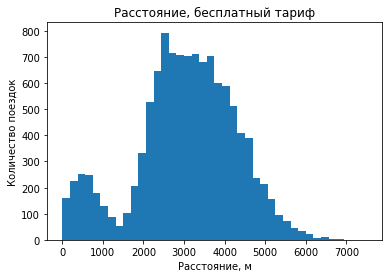

<Figure size 1440x1440 with 0 Axes>

In [34]:
#Строим гистограмму, которая покаже какое количество пользователей приеодаливает определенное расстояние
plt.hist(free_sub['distance'], bins=40, range = (0, 7500))
plt.title('Расстояние, бесплатный тариф')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество поездок')
plt.figure(figsize=(20,20))
plt.show()

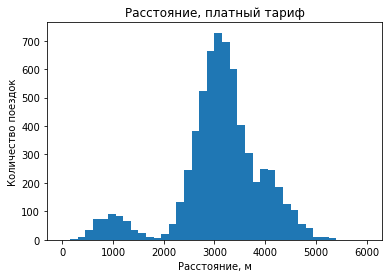

<Figure size 1440x1440 with 0 Axes>

In [35]:
#Расстояние, которое проезжают пользователи с платным тарифом
plt.hist(ultra_sub['distance'], bins=40, range = (0, 6000))
plt.title('Расстояние, платный тариф')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество поездок')
plt.figure(figsize=(20,20))
plt.show()

***Вывод:***

Пользователи, которы пользуются ***бесплатным тарифом*** проезжают от 2 до 5 км, есть пользователи, которые проехали даже 6, 6.5 км.

Пользователи, которые пользуются ***платным тарифом*** пик расстояния приходится на 3км. Основное расстояние приходится в диапозоне от 2.3 до 4,3 км 

Можно сделать вывод, что пользователи с ***бесплатным*** проезжают большее расстояние, чем пользователи на ***платном*** тарифе.

***Визуализируем информацию о времени поездки на бесплатном тарифе и платном***

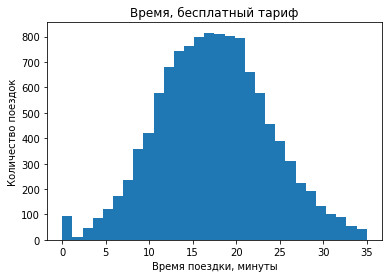

<Figure size 1440x1440 with 0 Axes>

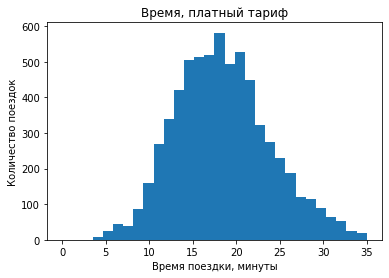

<Figure size 1440x1440 with 0 Axes>

In [36]:
# Построем гистограмму, времени поездок пользователей без подписок
plt.hist(free_sub['duration'], bins=30, range = (0, 35))
plt.title('Время, бесплатный тариф')
plt.xlabel('Время поездки, минуты')
plt.ylabel('Количество поездок')
plt.figure(figsize=(20,20))
plt.show()

# Построем гистограмму, времени поездок пользователей с подпиской
plt.hist(ultra_sub['duration'], bins=30, range = (0, 35))
plt.title('Время, платный тариф')
plt.xlabel('Время поездки, минуты')
plt.ylabel('Количество поездок')
plt.figure(figsize=(20,20))
plt.show()

***Вывод:***

Для ***бесплатного*** тарифа время поездки составляет от 10 до 30 минут.

***Платный тариф***. В основном время укладывается в промежуток от 15 до 25 минут.

Пользователи, которые пользуются подпиской, пероятно совершают одни и теже поездки, поэтому их значение не такое хаотичное! 

### Вывод

- Объединили данные о пользователях, поездках и тарифах в один датафрейм - full_data.

 Выделили два датафрейма на основе ***full_data***:

    - free_sub - Информация о пользователях с бесплатным тарифом
    - ultra_sub - Информация о пользователях с платным тарифом
    - Визуализировали информацию о расстоянии и времени для каждого из тарифов.

Для бесплатного тарифа время поездки составляет от 10 до 30 минут, и проезжают от 2 до 5 км, так же есть пользователи, которые проехали даже 6, 6.5 км.

Платный тариф. В основном время укладывается в промежуток от 15 до 25 минут. Пик расстояния приходится на 3км. Намного меньше значений, которые удалены от пика

Таким образом, можно сделать вывод, что пользователи с бесплатным тарифом в целом совершают более долгие поездки, а также проезжают большее расстояние, чем пользователи на платном тарифе.

## 5. Подсчёт выручки

5.1 Создадим датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4

Найдем для каждого пользователя за каждый месяц:
- суммарное расстояние 
- количество поездок 
- суммарное время 

5.2 Дабавим в этот датафрейм столбец с помесечной выручкой, которую принёс каждый пользователь.


***5.1 Создадим датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4***

In [37]:
#создаем сводную таблицу
total_data = pd.pivot_table(full_data,
                           index=['month', 'user_id'],
                           values = ['distance', 'duration', 'name', 'subscription_type'],
                           aggfunc = {'distance': sum, # суммарная дистанция
                                      'duration' : sum, #суммарное время поездки
                                      'name' : len, # колличество поездок
                                      'subscription_type' : min} # наличие подписки
                           )

In [38]:
#меняем название name на count_tips 
total_data.rename(columns = {'name' : 'count_tips'}, inplace = True)

In [39]:
total_data.sort_values(by='month').head()

distance   duration  count_tips subscription_type
month user_id                                                       
1     1         7027.511294  41.416640           2             ultra
      1061     12637.249630  41.127775           3              free
      1063      3276.362299   9.560836           1              free
      1064      5297.324649  14.224595           1              free
      1065     14547.099333  96.301646           4              free

In [40]:
#выводим информацию о пользователе с номером 1 
total_data.query('user_id == 1')

,,distance,duration,count_tips,subscription_type
month,user_id,,,,
1,1,7027.511294,41.416640,2,ultra
4,1,754.159807,6.232113,1,ultra
8,1,6723.470560,44.776802,2,ultra
10,1,5809.911100,31.578017,2,ultra
11,1,7003.499363,53.397424,3,ultra
12,1,6751.629942,27.203912,2,ultra


Из таблицы выидно, что пользователь совершал каждый месяц по 1 поездки, причем достаточно протяженные, как по времени, так и по дистанции!

Так же видно, что у этого пользователся была очень короткая поездка, 7 минут! 

У пользователя так же подключена подписка !

***5.2 Дабавим в этот датафрейм столбец с помесечной выручкой, которую принёс каждый пользователь.***

Для того, чтобы выяснить какую сумму принес каждый пользователь за месяц, нужно учитывать слудующие факты:

    Без подписки
    
        - абонентская плата отсутствует;
        - стоимость одной минуты поездки —  8 рублей;
        - стоимость старта (начала поездки) — 50 рублей;


    С подпиской Ultra
    
        - абонентская плата — 199 рублей в месяц;
        - стоимость одной минуты поездки — 6 рублей;
        - стоимость старта — бесплатно.

Создадим функцию, которая будет учитывая выше факты считать сколько пользователь принес денег за месяц

In [41]:
def profit(row):
    if row['subscription_type'] == 'ultra':#если человек подписан, то умножить время поездки на 6 и прибавить 199
        return 6 * row['duration'] + 199
    elif row['subscription_type'] == 'free': #если человек не подписан, то общее время поездки умножаем на 6 и добавляем колличество стартов
        return 8 * row['duration'] + 50 * row['count_tips']
    else:
        return 'Нет информации'

In [42]:
total_data['profit_month'] = total_data.apply(profit, axis=1)

In [43]:
total_data.head()

distance   duration  count_tips subscription_type  \
month user_id                                                         
1     1        7027.511294  41.416640           2             ultra   
      3        3061.777147  12.654443           1             ultra   
      5        3914.646990  12.395153           1             ultra   
      7        6478.080979  27.653450           2             ultra   
      12       3577.151148  32.462907           1             ultra   

               profit_month  
month user_id                
1     1          447.499843  
      3          274.926657  
      5          273.370917  
      7          364.920700  
      12         393.777441

In [44]:
total_data.query('user_id == 1')

,,distance,duration,count_tips,subscription_type,profit_month
month,user_id,,,,,
1,1,7027.511294,41.416640,2,ultra,447.499843
4,1,754.159807,6.232113,1,ultra,236.392681
8,1,6723.470560,44.776802,2,ultra,467.660815
10,1,5809.911100,31.578017,2,ultra,388.468102
11,1,7003.499363,53.397424,3,ultra,519.384541
12,1,6751.629942,27.203912,2,ultra,362.223471


Пользователь с id=1 да первый месяц принес 451 рублей, минимальная прибль которую принес пользователь 241 рубль. В этом случае большая часть это плата за ежемесячную подписку.

***Вывод***

Создали новый датафрейм с агрегированными данными (total_data) на основе датафрейма с объединенными данными (full_data).

Нашли суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц. Также добавили столбец с помесячной выручкой, которую принес каждый пользователь.

## 6. Проверка гипотез

Проверим следующие гипотезы:

6.1 Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

6.2 Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы.


6.3 Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.


6.4 Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

***6.1 Важно понять, тратят ли пользователи с подпиской больше времени на поездки?***

Проверим гипотезу: пользователи с подпиской тратят больше времени на поездки, чем пользователи на бесплатном тарифе.

H_0: Время (duration) пользователей на подписке ultra = время (duration) пользователей на подписке free

H_1: Время (duration) пользователей на подписке ultra > время (duration) пользователей на подписке free

alpha = 0.05

In [45]:
ultra = ultra_sub['duration'] 

free = free_sub['duration']

results = st.ttest_ind(ultra, 
                       free,
                       alternative = 'greater')

alpha = 0.05

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

1.2804098316645618e-34
Отвергаем нулевую гипотезу


***Вывод***

Проверили гипотезу, отвергли гипотезу о том, что время поездки пользователей на тарифе ultra равно времени поездки пользователей на тарифе free.

***6.2 Проверка гипотезы, о растоянии одного заезда***

Проверим гипотезу: пользователи с подпиской проезжают расстояние, не превышающее 3130 метров за одну поездку.

H_0: Расстояние (distance) пользователей на подписке ultra = 3130 метров

H_1: Расстояние (distance) пользователей на подписке ultra < 3130 метров

alpha = 0.05

In [46]:
ultra_dist = ultra_sub['distance']

interested_value = 3130.0

alpha = 0.05

results = st.ttest_1samp(
    ultra_dist, 
    interested_value,
    alternative='less')
    
print(results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

0.08046311521502146
Не удалось отвергнуть нулевую гипотезу


***Вывод***

Проверили гипотезу, и мы не можем утверждать, что расстояние, которое проехали пользователи на тарифе ultra не превышает 3130 метров.

***6.3 Проверка гипотезы о прибыльности подписки***

Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.

Проверим гипотезу: помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки

H_0: Выручка (profit_month) пользователей на подписке ultra = выручка (profit_month) пользователей на подписке free

H_1: Выручка (profit_month) пользователей на подписке ultra > выручка (profit_month) пользователей на подписке free

alpha = 0.05

In [47]:
ultra_per_mnth = total_data.loc[total_data.subscription_type == 'ultra', 'profit_month'] 

free_per_mnth = total_data.loc[total_data.subscription_type == 'free', 'profit_month'] 


results = st.ttest_ind(ultra_per_mnth, 
                       free_per_mnth,
                       alternative = 'greater')

alpha = 0.05

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

2.8999112105809456e-37
Отвергаем нулевую гипотезу


***Вывод***

Проверили гипотезу и  можем утверждать, что выручка с пользователей с подпиской ultra превышает выручку с пользователей на подписке free

6.4
Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Мое предположение:

Нужно воспользоваться гипотезой о равенстве средних для зависимых (парных) выборок.

Гипотезы будут сформулированы так:

***H0 : μ1 = μ2***

***H1 : μ1 != μ2***

где:

***μ1***- средние значения количество обращений до изменений 

***μ2***- средние значения количество обращений после изменения.

Метод, который нужно использовать при сравнении: ***scipy.stats.ttest_rel()***

## Вывод

***Провели исследовательский анализ данных:***

- Вывели, что количество пользователей по городам распределено примерно одинаково, нет выдающихся значений. Лидером по количеству пользователей является Пятигорск - 219 пользователей. Меньше всего пользователей в Москве - 168.
- Пользователей, использующих бесплатную подписку больше - 835 человек, что является ~54% от общего числа пользователей. На платной подписке сидит 699 пользователей, что соответственно является ~46%.
- Возраст пользователей укладывается в промежуток от 20 до 30 лет
- В основном пользователи проезжают от 2.5 км до 4 км.
- Чаще всего длительность поездки состовляет 13 - 22 минут

***Объединили данные о пользователях, поездках и подписках в один датафрейм. На основе объединенного датафрейма создали еще 2 датафрейма:***
- Для пользователей с ultra подпиской
- Для пользователей с free подпиской

***Дальше визуализировали информацию о расстоянии и времени поездки для пользоватей каждого тарифа.***
- Для бесплатного тарифа время поездки составляет от 10 до 30 минут, и проезжают от 2 до 5 км, есть пользователи, которые проехали даже больше 7 км 
- Платный тариф. В основном время укладывается в промежуток от 15 до 25 минут. Пик расстояния приходится на 3км.
- Нашли суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц - вывели все данные в отдельный датафрейм total_data. Добавили в датафрейм total_data столбец с помесячной выручкой revenue_per_month.

***Проверили гипотезы:***

- Пользователи с подпиской тратят больше времени на поездки, чем пользователи на бесплатном тарифе
   - - ***Отвергли нулевую гипотезу***
- Пользователи с подпиской проезжают расстояние, не превышающее 3130 метров за одну поездку
   - -  ***Не удалось отвергнуть нулевую гипотезу***
- Помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки
  - - ***Отвергли нулевую гипотезу***